<h1>2022.05.19. 강의 시간내 실습</h1>

In [130]:
import pandas as pd

candy = pd.read_csv("C:/ai_dataset/candy-data.csv")

In [131]:
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in candy.columns :
    candy[i] = le.fit_transform(candy[i])

In [133]:
candy.drop(labels='competitorname',axis=1, inplace=True)

In [134]:
candy.isna().sum()

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [135]:
from sklearn.model_selection import train_test_split

X = candy.drop('pricepercent',axis=1).values
y = candy['pricepercent']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

In [136]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [137]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [138]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(40, activation='relu', input_shape=(11, )))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))


model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 40)                480       
                                                                 
 dense_32 (Dense)            (None, 20)                820       
                                                                 
 dense_33 (Dense)            (None, 10)                210       
                                                                 
 dense_34 (Dense)            (None, 8)                 88        
                                                                 
 dense_35 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,616
Trainable params: 1,616
Non-trainable params: 0
_________________________________________________________________


In [139]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, batch_size=64, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 587ms/step - loss: 301.5658 - mae: 15.9548 - val_loss: 236.7035 - val_mae: 13.5594
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 299.6374 - mae: 15.8929 - val_loss: 235.6198 - val_mae: 13.5245
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 297.8592 - mae: 15.8366 - val_loss: 234.3688 - val_mae: 13.4854
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 296.1358 - mae: 15.7818 - val_loss: 233.1600 - val_mae: 13.4473
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 294.4792 - mae: 15.7286 - val_loss: 231.9766 - val_mae: 13.4098
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 292.8876 - mae: 15.6770 - val_loss: 230.7926 - val_mae: 13.3721
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 291.2775 - mae: 15.6245 - val_loss: 229.6135 - val_mae: 13.3346
Epoch 8/100
1/1 [==============================

In [140]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 37.0374 - mae: 5.0701


[37.037418365478516, 5.0700554847717285]

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

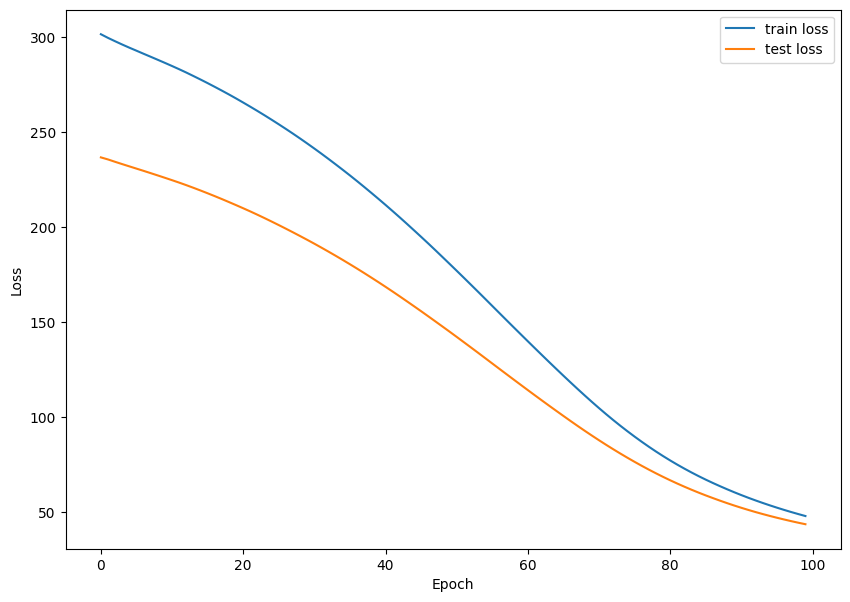

In [142]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

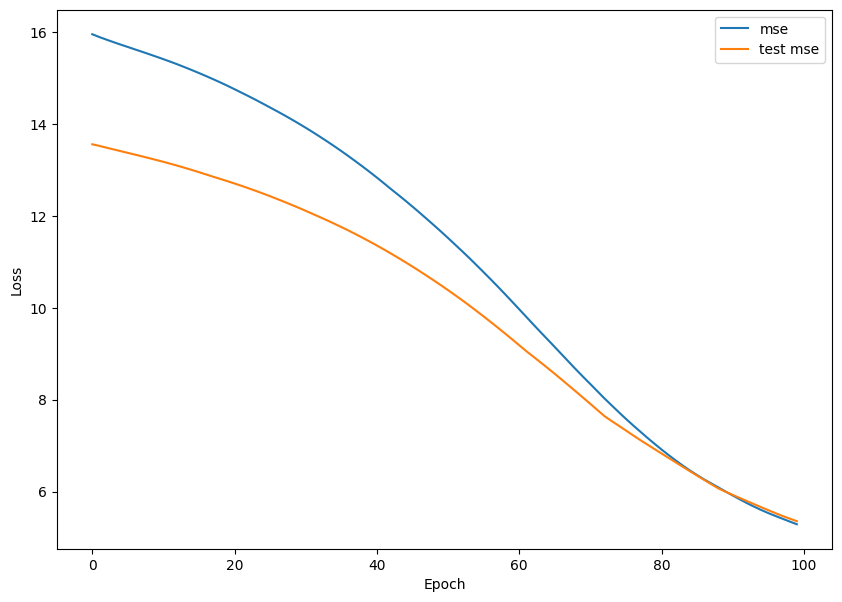

In [143]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()